In [1]:
# 生成斜45度条纹图片
# 2025/03/18

from PIL import Image, ImageDraw

# 图片大小
width, height = 800, 800

# 创建空白图片
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# 定义四种颜色
colors = [
    (0,255,255),
    (255,0,0),
    (0,128,0)
]

# 条纹宽度
stripe_width = 50

# 绘制斜45度条纹
for x in range(width):
    for y in range(height):
        # 计算斜45度的位置
        pos = (x + y) // stripe_width
        # 根据位置选择颜色
        color = colors[pos % len(colors)]
        # 绘制像素
        draw.point((x, y), fill=color)

# 保存图片
image.save("diagonal_stripes.png")

# 显示图片
image.show()

In [ ]:
# 颜色百分比测试脚本
# 2025/03/18
from PIL import Image
from colorthief import ColorThief
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

def get_image_colors(image_path, num_colors=5):
    # 打开图像
    img = Image.open(image_path)
    
    # 转换为RGB模式
    img = img.convert('RGB')
    
    # 获取所有像素值
    pixels = np.array(img).reshape(-1, 3)
    
    # 计算每个颜色的出现次数
    pixel_counts = Counter(map(tuple, pixels))
    
    # 按出现次数排序
    sorted_pixel_counts = pixel_counts.most_common(num_colors)
    
    # 获取主颜色及其占比
    total_pixels = sum(count for color, count in sorted_pixel_counts)
    color_proportions = {f'#{r:02x}{g:02x}{b:02x}': count / total_pixels * 100 for (r, g, b), count in sorted_pixel_counts}
    
    return color_proportions


def show_color_distribution(image_path):
    # 获取颜色占比
    color_proportions = get_image_colors(image_path)
    
    # 显示颜色分布
    plt.figure(figsize=(6, 2))
    plt.bar(color_proportions.keys(), color_proportions.values(), color=color_proportions.keys())
    plt.title("Color Proportions")
    plt.xlabel("Color")
    plt.ylabel("Percentage")
    plt.show()

# 你可以将此处的路径更改为你自己的图像路径
image_path = "./flag/turkey.png"

# 获取图像的颜色占比
color_proportions = get_image_colors(image_path, num_colors=5)

# 输出颜色占比
print(color_proportions)

# 显示颜色占比图表
show_color_distribution(image_path)


In [ ]:

# 打印图例
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

legend_elements = [
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightblue', markersize=10, label='好莱坞环球影城', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightgreen', markersize=10, label='奥兰多环球影城度假村', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightcoral', markersize=10, label='日本环球影城', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightyellow', markersize=10, label='北京环球度假区', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightpink', markersize=10, label='新加坡环球影城', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgrey', markersize=10, label='英国环球影城(在建)', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='center', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_axis_off()

# 保存图像并显示
plt.savefig('test.png', dpi=1200, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()


In [28]:
import requests
import pandas as pd
import geopandas as gpd

def get_gaode_parks(api_key, city=None, output_file='people_park.csv'):
    base_url = "https://restapi.amap.com/v3/place/text"
    
    # 如果未指定城市，则搜索全国
    # if city is None:
    #     city = "中国"
    
    params = {
        'key': api_key,
        'keywords': '人民公园',
        # 'types': '110101',
        'city': city,
        'citylimit': 'true',
        'offset': 25,  # 每页记录数
        'page': 1,      # 页码
        'extensions': 'base'
    }
    
    all_parks = []
    
    while True:
        response = requests.get(base_url, params=params)
        data = response.json()
        print(data)  # 打印返回的JSON数据
        if data['status'] == '1' and int(data['count']) > 0:
            for poi in data['pois']:
                park_info = {
                    'name': poi['name'],
                    'address': poi['address'],
                    'province': poi['pname'],
                    'city': poi['cityname'],
                    'district': poi['adname'],
                    'longitude': poi['location'].split(',')[0],
                    'latitude': poi['location'].split(',')[1]
                }
                if '人民公园' in poi['name']:
                    all_parks.append(park_info)
            
            if len(data['pois']) < params['offset']:
                break
            params['page'] += 1
        else:
            break
    
    # 保存到CSV文件
    df = pd.DataFrame(all_parks)
    df.to_csv(output_file, index=False, encoding='utf_8_sig')
    return df

# 使用示例
api_key = "fe09ffacf890bf1c9471054ce5dc122d"
world = gpd.read_file('./shp2json/chinacity.geojson')
for city_name in world['name']:
    parks_df = get_gaode_parks(api_key, city=city_name)
    
print('success!')

{'suggestion': {'keywords': [], 'cities': []}, 'count': '16', 'infocode': '10000', 'pois': [{'parent': [], 'address': '兴田一路314号', 'distance': [], 'pname': '广东省', 'importance': [], 'biz_ext': [], 'biz_type': 'tour', 'cityname': '梅州市', 'type': '风景名胜;公园广场;公园', 'photos': [], 'typecode': '110101', 'shopinfo': '2', 'poiweight': [], 'childtype': [], 'adname': '兴宁市', 'name': '兴宁人民公园', 'location': '115.725878,24.143386', 'tel': '0753-3328130;0753-3331332', 'shopid': [], 'id': 'B02F103OU3'}, {'parent': [], 'address': '(停运)兴宁22路;兴宁17路;兴宁19路;兴宁1路;兴宁3路;兴宁7路', 'distance': [], 'pname': '广东省', 'importance': [], 'biz_ext': [], 'biz_type': [], 'cityname': '梅州市', 'type': '交通设施服务;公交车站;公交车站相关', 'photos': [], 'typecode': '150700', 'shopinfo': '2', 'poiweight': [], 'childtype': [], 'adname': '兴宁市', 'name': '人民公园站(公交站)', 'location': '115.726766,24.143100', 'tel': [], 'shopid': [], 'id': 'BV09049289'}, {'parent': [], 'address': '兴田一路人民公园内', 'distance': [], 'pname': '广东省', 'importance': [], 'biz_ext': [], 'biz_

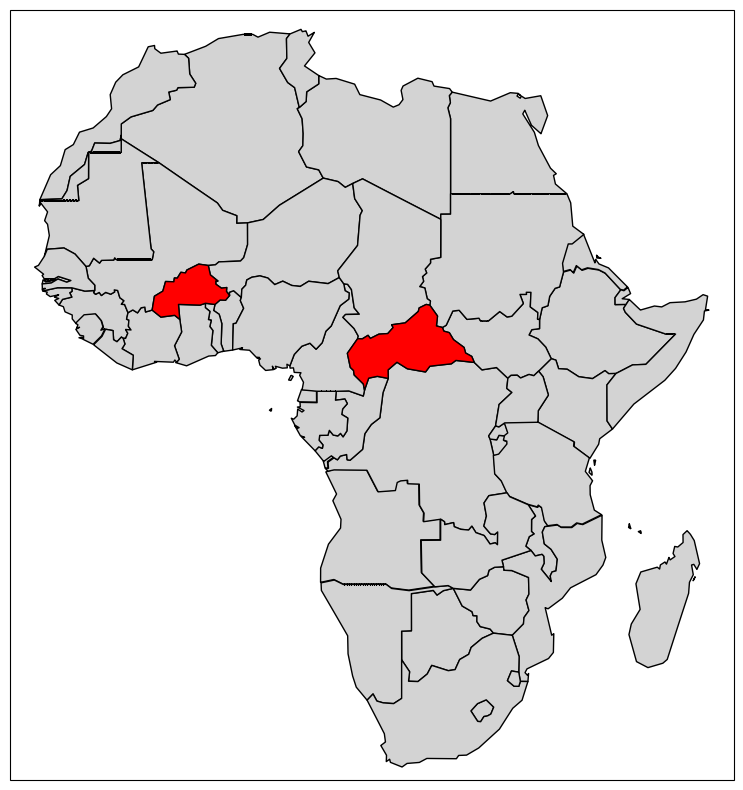

In [2]:
# 非洲通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon
import cartopy.feature as cfeature

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())

world = gpd.read_file('./worldmap4/world_update.json')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
# world.plot(ax=ax, color='darkgray', edgecolor='white', linewidth=1, transform=ccrs.PlateCarree())

countries_to_fill1 = [
    "阿尔及利亚",
    "埃及",
    "埃塞俄比亚",
    "安哥拉",
    "贝宁",
    "博茨瓦纳",
    "布隆迪",
    "赤道几内亚",
    "多哥",
    "厄立特里亚",
    "佛得角",
    "冈比亚",
    "刚果（金）",
    "刚果（布）",
    "吉布提",
    "几内亚",
    "几内亚比绍",
    "加纳",
    "加蓬",
    "津巴布韦",
    "喀麦隆",
    "科摩罗",
    "科特迪瓦",
    "肯尼亚",
    "莱索托",
    "利比里亚",
    "利比亚",
    "卢旺达",
    "马达加斯加",
    "马拉维",
    "马里",
    "毛里求斯",
    "毛里塔尼亚",
    "摩洛哥",
    "莫桑比克",
    "纳米比亚",
    "南非",
    "南苏丹",
    "尼日尔",
    "尼日利亚",
    "塞拉利昂",
    "塞内加尔",
    "塞舌尔",
    "圣多美和普林西比",
    "斯威士兰",
    "苏丹",
    "索马里",
    "坦桑尼亚",
    "突尼斯",
    "乌干达",
    "赞比亚",
    "乍得",
    "西撒哈拉",
]
loopFillColor(countries_to_fill1, 'lightgrey')
countries_to_fill2 = [
    "中非",
    "布基纳法索"
]
loopFillColor(countries_to_fill2, 'red')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([-20, 54, -36, 39], crs=ccrs.PlateCarree())
plt.savefig('非洲.png', dpi=1200, bbox_inches='tight')
plt.show()

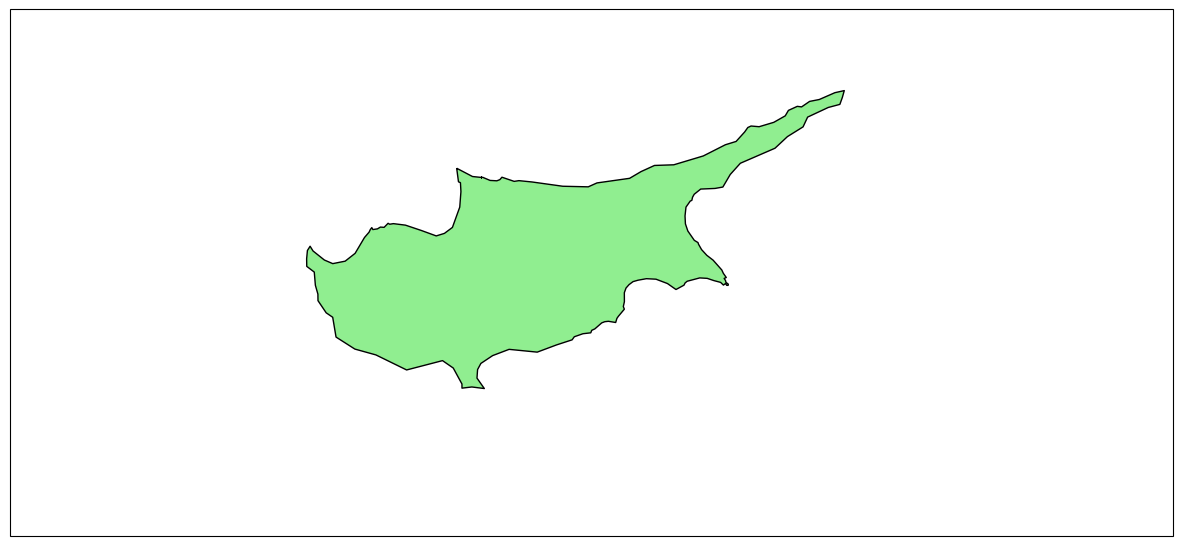

In [3]:
# kml2json通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='white', linewidth=1, transform=ccrs.PlateCarree())

world = gpd.read_file('./worldmap4/world_update.json')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})

plugin = gpd.read_file('./kml2geojson/Cyprus.geojson')
plugin = plugin.to_crs(ccrs.PlateCarree())
plugin.plot(ax=ax, color='lightgreen', edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([-1, 4, 40, 43.5], crs=ccrs.PlateCarree())
ax.set_extent([31, 36, 34, 36], crs=ccrs.PlateCarree())
plt.savefig('kml.png', dpi=1200, bbox_inches='tight')
plt.show()

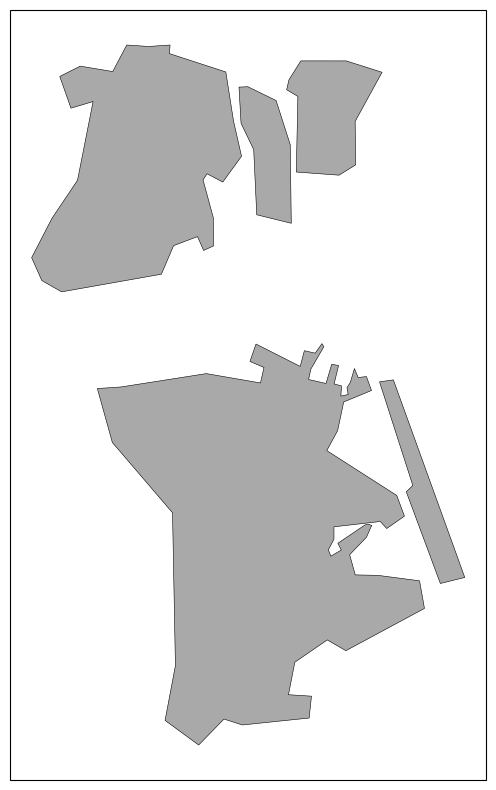

In [8]:
# 中国行政区通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())

# world = gpd.read_file('./shp2json/chinaprovince.geojson')
world = gpd.read_file('./kml2geojson/macau.geojson')
world = world.to_crs(ccrs.PlateCarree())
# country_data = world[world['name'] == '香港特别行政区']

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
world.plot(ax=ax, color='darkgray', edgecolor='k', linewidth=0.4, transform=ccrs.PlateCarree())

# countries_to_fill1 = ['秀洲区']
# loopFillColor(countries_to_fill1, 'lightgreen')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([119, 123, 21.5, 26], crs=ccrs.PlateCarree())
# ax.set_axis_off()
plt.savefig('province.png', dpi=1200, bbox_inches='tight')
plt.show()

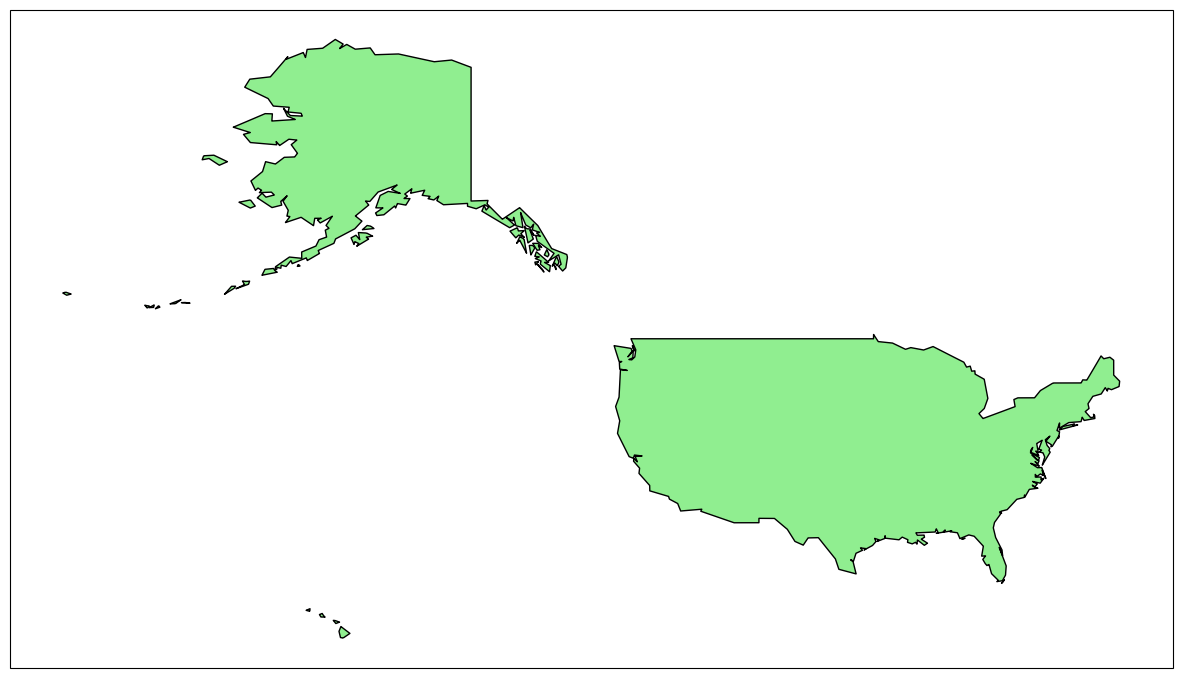

In [4]:
# 国家通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())

world = gpd.read_file('./worldmap4/world_update.json')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
# world.plot(ax=ax, color='darkgray', edgecolor='white', linewidth=1, transform=ccrs.PlateCarree())

countries_to_fill1 = ['美国']
loopFillColor(countries_to_fill1, 'lightgreen')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([108, 161, -44, -7], crs=ccrs.PlateCarree())
plt.savefig('国家专用2.png', dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
# 截取封闭图形（红色闭合圈） design by chatgpt
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# 2025/03/18

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取上传的图像
img_path = "./semi_earth.png"
img = cv2.imread(img_path)

# 转换为HSV色彩空间
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 红色范围（两个区段）
lower_red1 = np.array([0, 70, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 70, 50])
upper_red2 = np.array([180, 255, 255])

# 提取红色区域掩膜
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# 提取轮廓
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if not contours:
    raise ValueError("未检测到红色闭合线")

# 取最大轮廓
main_contour = max(contours, key=cv2.contourArea)

# 创建掩膜，仅保留红线内部内容
mask_inside = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.drawContours(mask_inside, [main_contour], -1, 255, thickness=cv2.FILLED)

# 构造最终图像：红线内部保留，其余变白
white_bg = np.full_like(img, 255)
result = np.where(mask_inside[:, :, None] == 255, img, white_bg)

# 保存结果图像
output_path = "./semi_earth_update.png"
cv2.imwrite(output_path, result)

output_path

In [ ]:
# 截取封闭图形（黑色闭合圈） design by chatgpt
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# 2025/03/18

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取上传的图像
img_path = "./semi_earth.png"
img = cv2.imread(img_path)

# 转换为HSV色彩空间
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])  # 你可以将 50 稍微调高或调低

# 生成掩膜
mask_black = cv2.inRange(hsv, lower_black, upper_black)

# 提取轮廓
contours, _ = cv2.findContours(mask_black, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if not contours:
    raise ValueError("未检测到红色闭合线")

# 取最大轮廓
main_contour = max(contours, key=cv2.contourArea)

# 创建掩膜，仅保留红线内部内容
mask_inside = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.drawContours(mask_inside, [main_contour], -1, 255, thickness=cv2.FILLED)

# 构造最终图像：红线内部保留，其余变白
white_bg = np.full_like(img, 255)
result = np.where(mask_inside[:, :, None] == 255, img, white_bg)

# 保存结果图像
output_path = "./semi_earth_update.png"
cv2.imwrite(output_path, result)

output_path

'./semi_earth_update.png'

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon
import json


def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))


def calculate_weighted_average_color(image_data):
    total_weight = 0
    weighted_rgb = [0, 0, 0]

    for color_data in image_data['color']:
        for hex_color, percentage in color_data.items():
            rgb = hex_to_rgb(hex_color)
            weight = percentage / 100
            for i in range(3):
                weighted_rgb[i] += rgb[i] * weight
            total_weight += weight

    weighted_average_rgb = tuple(int(c / total_weight) for c in weighted_rgb)
    
    weighted_average_hex = '#{:02x}{:02x}{:02x}'.format(*weighted_average_rgb)

    return weighted_average_hex, weighted_average_rgb


def process_json_file(input_json_path):
    with open(input_json_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
    
    result = []

    for image_data in data:
        image_name = image_data['name']
        weighted_average_color, weighted_average_rgb = calculate_weighted_average_color(image_data)
        
        result.append({
            'name': image_name,
            'weighted_average_color': weighted_average_color
        })
    
    return result


def save_results_to_json(results, output_path):
    with open(output_path, 'w', encoding='utf-8') as json_file:
        json.dump(results, json_file, indent=4, ensure_ascii=False)


input_json_path = 'national_flag_avg_color_by_area_percent.json' 
output_json_path = 'national_flag_avg_color_by_area_percent_mix.json'

results = process_json_file(input_json_path)

save_results_to_json(results, output_json_path)

print(f"加权平均颜色已保存至: {output_json_path}")

加权平均颜色已保存至: national_flag_avg_color_by_area_percent_mix.json


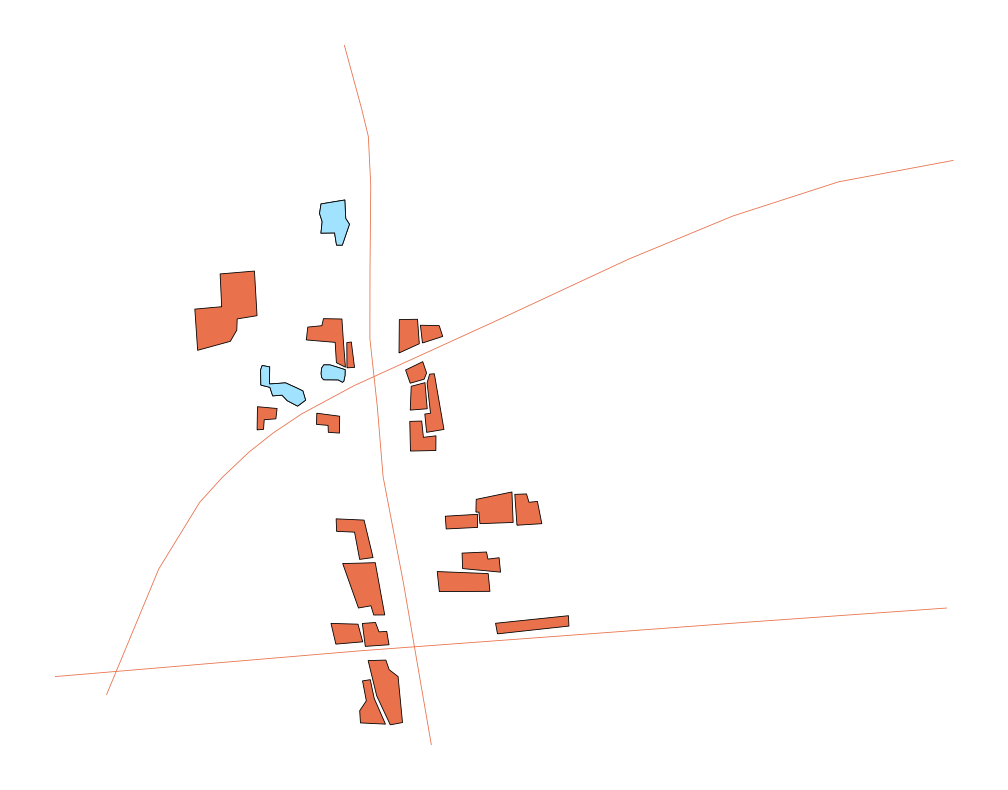

In [6]:
# seeker proj test
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 


def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='k', linewidth=0.6, transform=ccrs.PlateCarree())


# 读取地图数据
world = gpd.read_file('./seeker_geojson_files/xiaojian.geojson')
world = world.to_crs(ccrs.PlateCarree())

# 创建绘图对象
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Mercator(central_longitude=150)})
world.plot(ax=ax, color='#E9724C', edgecolor='black', linewidth=0.6, markersize=50, transform=ccrs.PlateCarree())
# road = world[world['name'].str.contains('G', na=False)]
# road.plot(ax=ax, color='#E9724C', linestyle='-', linewidth=2, zorder=5, transform=ccrs.PlateCarree())
# spot = world[~world['name'].str.contains('G', na=False)]
# spot.plot(ax=ax, color='#E9724C', edgecolor='k', markersize=50, zorder=6, transform=ccrs.PlateCarree())
# obj1 = world[world['name'] == 'G219']
# obj1.plot(ax=ax, color='black', linestyle='-', linewidth=4, zorder=5, transform=ccrs.PlateCarree())
# obj2 = world[world['name'] == 'G318']
# obj2.plot(ax=ax, color='black', linestyle='-', linewidth=4, zorder=6, transform=ccrs.PlateCarree())
# obj3 = world[world['name'] == 'G559']
# obj3.plot(ax=ax, color='black', linestyle='-', linewidth=4, zorder=6, transform=ccrs.PlateCarree())
# countries_to_fill1 = ['A01']
# loopFillColor(countries_to_fill1, '#C5283D')
# countries_to_fill1 = ['lake1', 'lake2', 'lake3', 'lake4']
# loopFillColor(countries_to_fill1, '#A1E3FF')
lake = world[world['name'].str.contains('lake', na=False)]
lake.plot(ax=ax, color='#A1E3FF', edgecolor='k', linewidth=0.6, transform=ccrs.PlateCarree())

# 保存图像并显示
ax.set_axis_off()
plt.savefig('xiaojian.png', dpi=1200, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()


4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802


d:\python\Lib\site-packages\ridge_map\ridge_map.py:159: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  is_lake = rank.gradient(img_as_ubyte(values), square(3)) < lake_flatness


<Axes: >

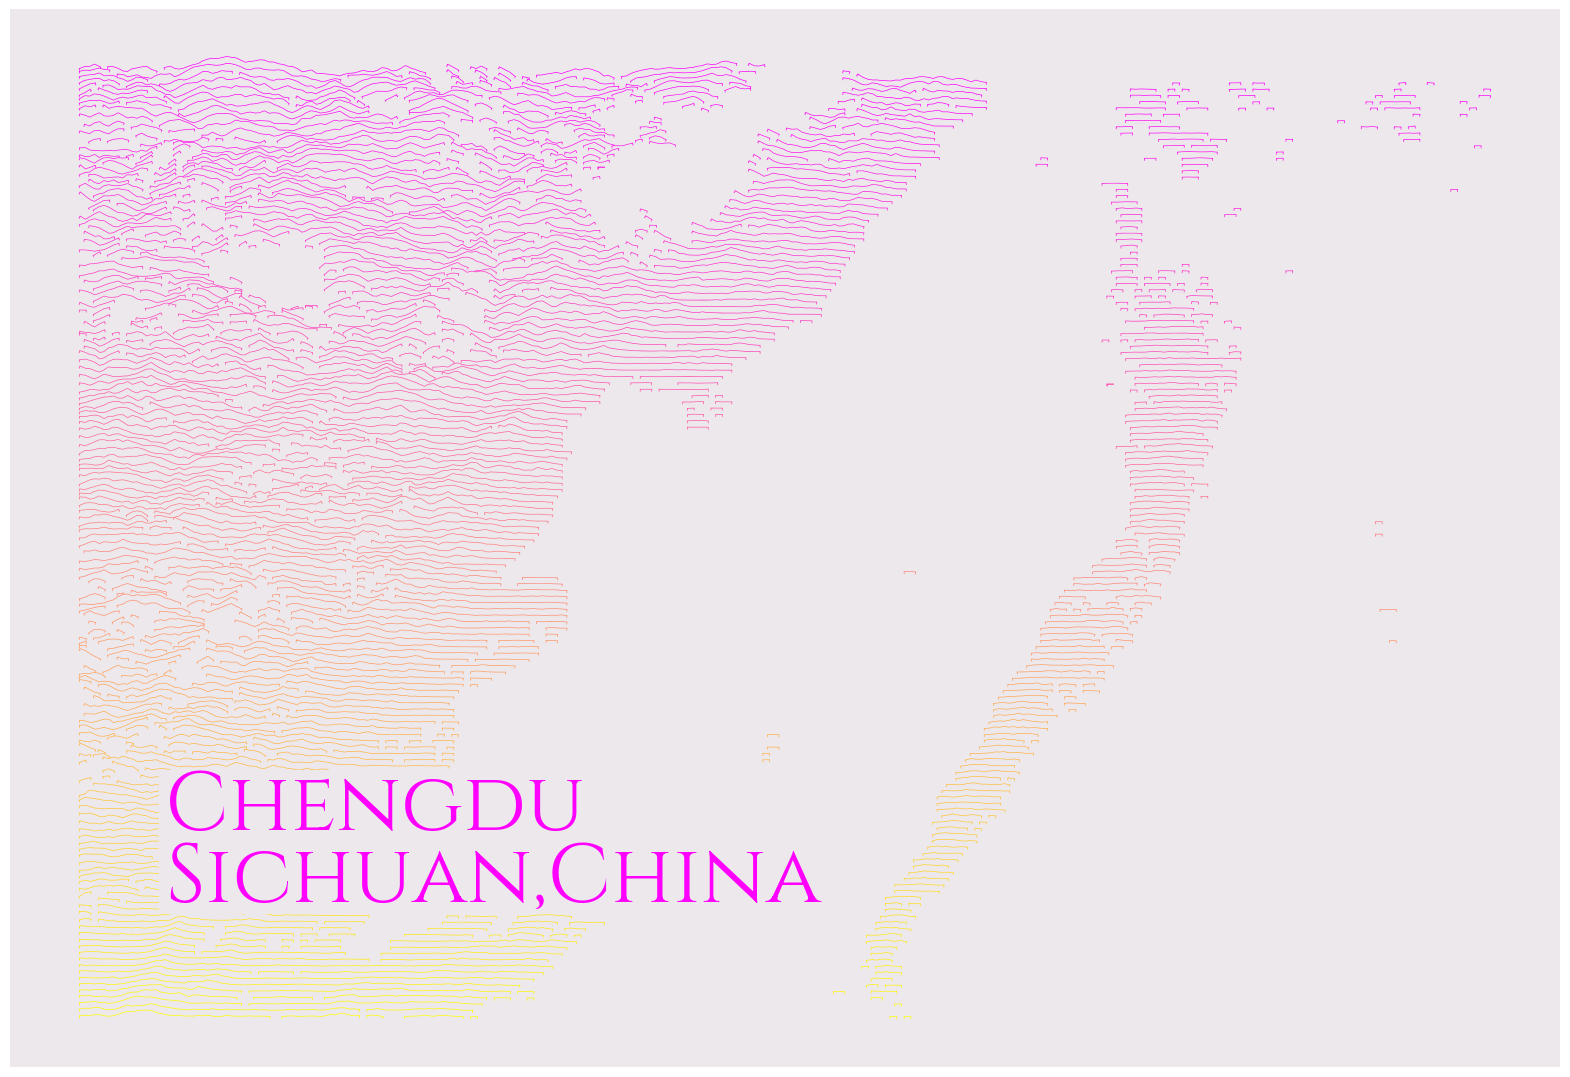

In [4]:
from ridge_map import RidgeMap
import matplotlib.pyplot as plt

rm = RidgeMap((102.84494,30.02969,105.03542,31.53394))
values = rm.get_elevation_data(num_lines=150)
rm.plot_map(values=rm.preprocess(values=values, lake_flatness=3, water_ntile=50, vertical_ratio=30),
            label='Chengdu\nSichuan,China',
            label_x=0.1,
            line_color = plt.get_cmap('spring'))

[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ 54. 197.  78. ...   0.   0.   0.]
 [147.   9.   8. ...   0.   0.   0.]
 [ 97.  72.   7. ...   0.   0.   0.]]
[[0.56919643 0.4296875  0.06696429 ... 0.02790179 0.02790179 0.02790179]
 [0.84821429 0.078125   0.07254464 ... 0.02790179 0.02790179 0.02790179]
 [0.32924107 1.12723214 0.46316964 ... 0.02790179 0.02790179 0.02790179]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


d:\python\Lib\site-packages\ridge_map\ridge_map.py:159: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  is_lake = rank.gradient(img_as_ubyte(values), square(3)) < lake_flatness


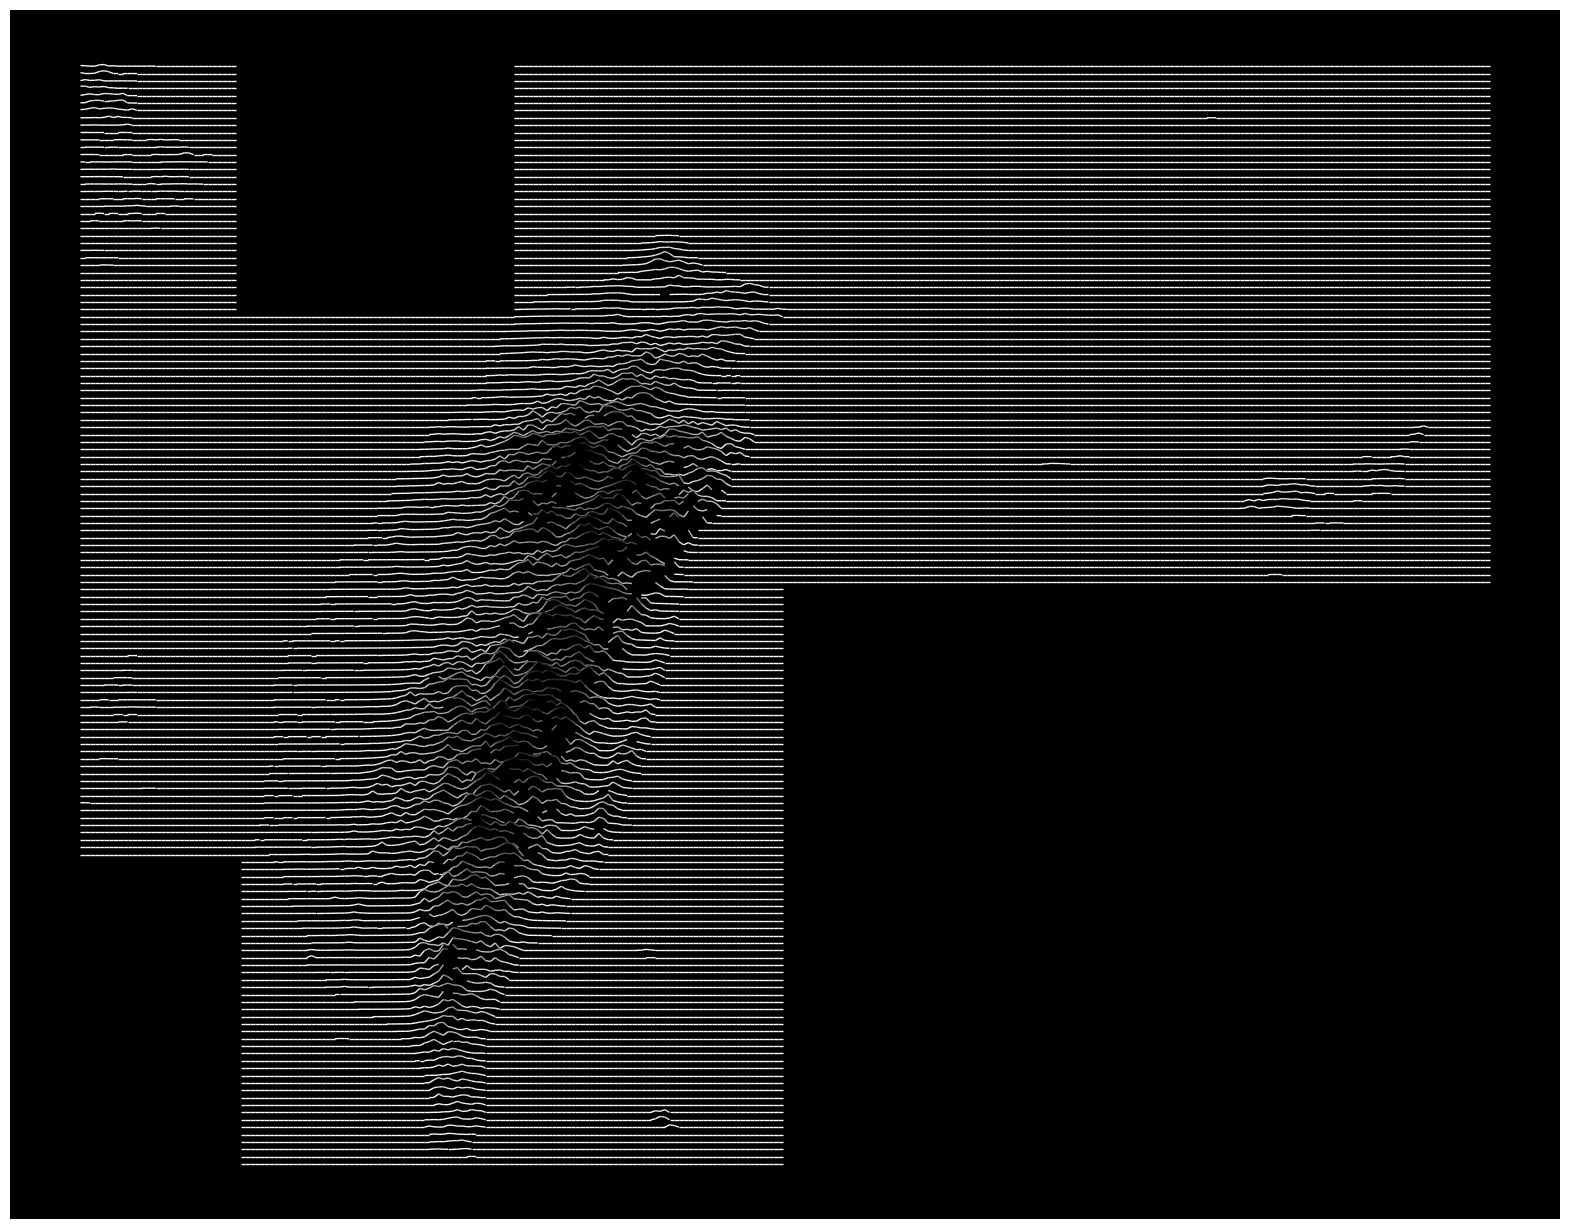

In [6]:
from ridge_map import RidgeMap
from ridge_map import FontManager
import matplotlib.pyplot as plt
import numpy as np

font = FontManager('https://github.com/google/fonts/blob/main/ofl/uncialantiqua/UncialAntiqua-Regular.ttf?raw=true')
bgcolor = np.array([65,74,76])/255
# rm = RidgeMap((102.99107875493583, 30.092136694735707, 104.8946963791243, 31.437593570043905), font=font.prop)
# rm = RidgeMap((113.79239408667682, 22.199060510560425, 114.41037509158333, 22.569845011791212), font=font.prop) # hk
rm = RidgeMap((119.42130899999952, 21.88333299999992, 124.58634599999954, 25.9397399999999), font=font.prop) # tw
values = rm.get_elevation_data(num_lines=150)
print(values)
values = rm.preprocess(values=values, lake_flatness=0, water_ntile=1, vertical_ratio=20)
print(values)

rm.plot_map(
    values=values,
    label=None,
    label_x=0.3,
    label_y=0.3,                 
    kind='elevation',
    line_color=plt.get_cmap('binary'), 
    linewidth=1,
    background_color='k'
)

plt.savefig('wave_map3.png', dpi=1200, bbox_inches='tight')
plt.show()

Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3
Skipping field acroutes: unsupported OGR type: 1


119.42130899999952 21.88333299999992 124.58634599999954 25.9397399999999


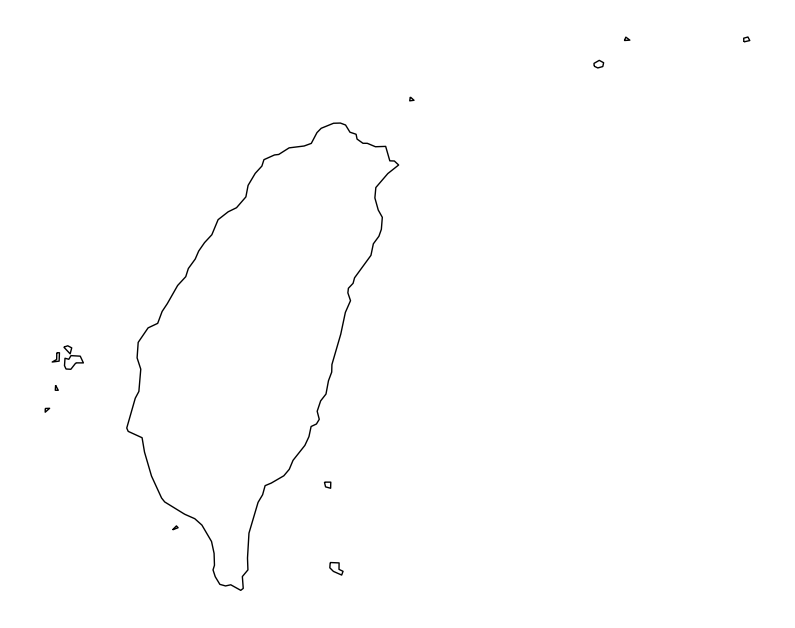

In [1]:
import geopandas as gpd
import cartopy.crs as ccrs
from ridge_map import RidgeMap
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

target = gpd.read_file('./chinamap/台湾省.geojson')
target = target.to_crs(ccrs.PlateCarree())
poly = target.union_all()
minx, miny, maxx, maxy = poly.bounds
print(minx, miny, maxx, maxy)

# chengdu = sichuan[(sichuan['name'].str.contains('成都'))]
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=150)})
target.plot(ax=ax, color="none", edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())
ax.set_axis_off()
# plt.savefig('target_border.png', dpi=1200, bbox_inches='tight', pad_inches=0, transparent=True)
# plt.savefig('四川中字县城.png', dpi=1200, bbox_inches='tight')


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv')
temp['month'] = pd.to_datetime(temp['Date']).dt.month
month_dict = {1: 'january',2: 'february',3: 'march',4: 'april',5: 'may',6: 'june',7: 'july',8: 'august',9: 'september',10: 'october',11: 'november',12: 'december'}
temp['month'] = temp['month'].map(month_dict)

month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

temp.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,month,mean_month
0,1/1/1948,10,8.0,7.0,january,4.493982
1,1/2/1948,6,4.0,3.0,january,4.493982
2,1/3/1948,7,4.0,2.0,january,4.493982
3,1/4/1948,7,4.0,2.0,january,4.493982
4,1/5/1948,7,3.0,0.0,january,4.493982


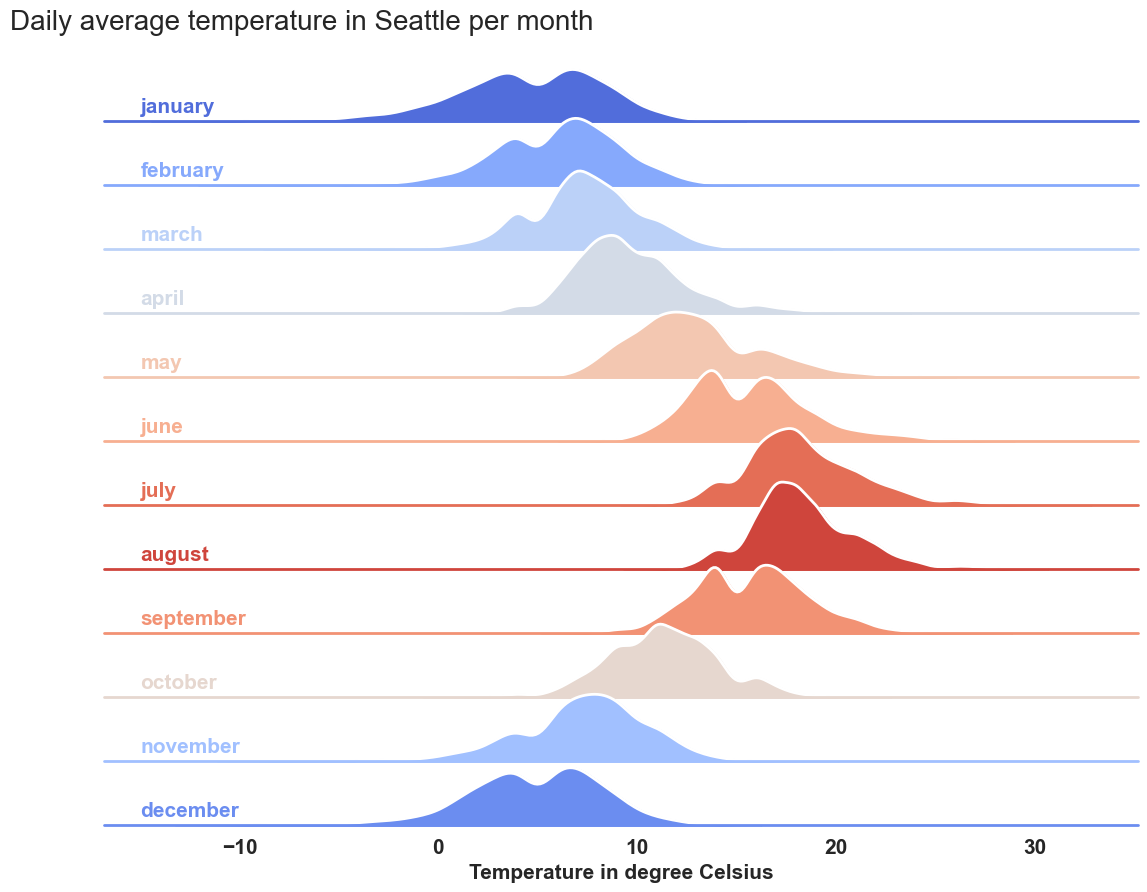

In [8]:
# 利用FacetGrid绘制山脊图

# 调色板
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# 初始12个月份的画布
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# 生成每个月温度Mean_TemperatureC的密度图
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# 给每个密度轮廓增添一条白线
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# 给每个密度图添加水平线
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# 增加对应的月份文本（颜色相对应）
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

# 重叠子图
g.fig.subplots_adjust(hspace=-0.3)

# 删除标题、标签、和边框
g.set_titles("")
g.set_ylabels("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


# 设置标题、标签以及相关参数美化
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()
